<a href="https://colab.research.google.com/github/sztyberj/PS4VideoGamesSales-DataVisualisation_in_R/blob/main/PS4_Games_Sales_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PS4 Video Games Sales in Japan - Data Analysis

Creation Date Dec 2021

DataSet: https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

#Import libs and get data

In [12]:
#Import libs
library(xopen)
library(ggplot2)
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [13]:
#Download file
url <- "https://raw.githubusercontent.com/sztyberj/PS4VideoGamesSales-DataAnalysis/main/PS4_GamesSales.csv"
file <- read.csv(url)

In [14]:
#Create DataFrame
Name <- file$Game
Value <- file$Japan
Year <- file$Year
Genre <- file$Genre

temp_df <- data.frame(Name, Value, Genre, Year)
temp_df

cat("Ilość wierszy: ")
cat(nrow(temp_df))

Name,Value,Genre,Year
<chr>,<dbl>,<chr>,<chr>
Grand Theft Auto V,0.60,Action,2014
Call of Duty: Black Ops 3,0.41,Shooter,2015
Red Dead Redemption 2,0.21,Action-Adventure,2018
Call of Duty: WWII,0.40,Shooter,2017
FIFA 18,0.15,Sports,2017
FIFA 17,0.12,Sports,2016
Uncharted (PS4),0.21,Action,2016
Spider-Man (PS4),0.32,Action-Adventure,2018
Call of Duty: Infinite Warfare,0.19,Shooter,2016


Ilość wierszy: 1034

#Data cleaning

In [15]:
#Clear rows with N/A or 0 

df <- temp_df
df[df==0 | df=='N/A'] <- NA

df <- df[complete.cases(df), ]

cat("Rows: ")
cat(nrow(df))

Rows: 395

#Multiplication Value column 

In [16]:
df$Value <- df$Value * 1000000

#Sort 
df <- df[order(df$Value, decreasing = TRUE), ]

#Clear indexes
row.names(df) <- NULL

df

Name,Value,Genre,Year
<chr>,<dbl>,<chr>,<chr>
Monster Hunter: World,2170000,Action,2018
Dragon Quest XI,1430000,Role-Playing,2017
Final Fantasy XV,1050000,Role-Playing,2016
Grand Theft Auto V,600000,Action,2014
Metal Gear Solid V: The Phantom Pain,500000,Action,2015
Persona 5,480000,Role-Playing,2016
Dark Souls III,440000,Role-Playing,2016
Knack,420000,Platform,2013
NieR Automata,420000,Role-Playing,2017


#The best-selling games in 2018-2013

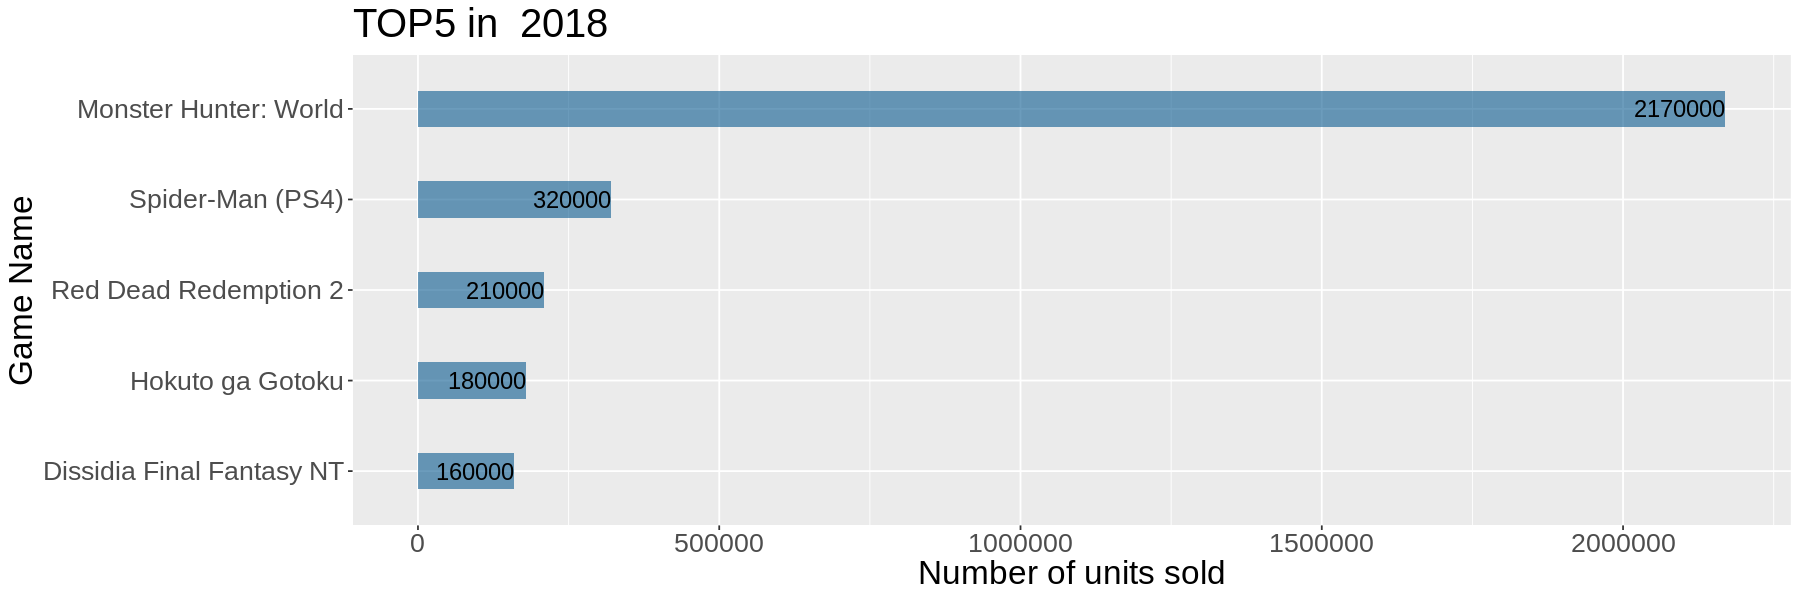

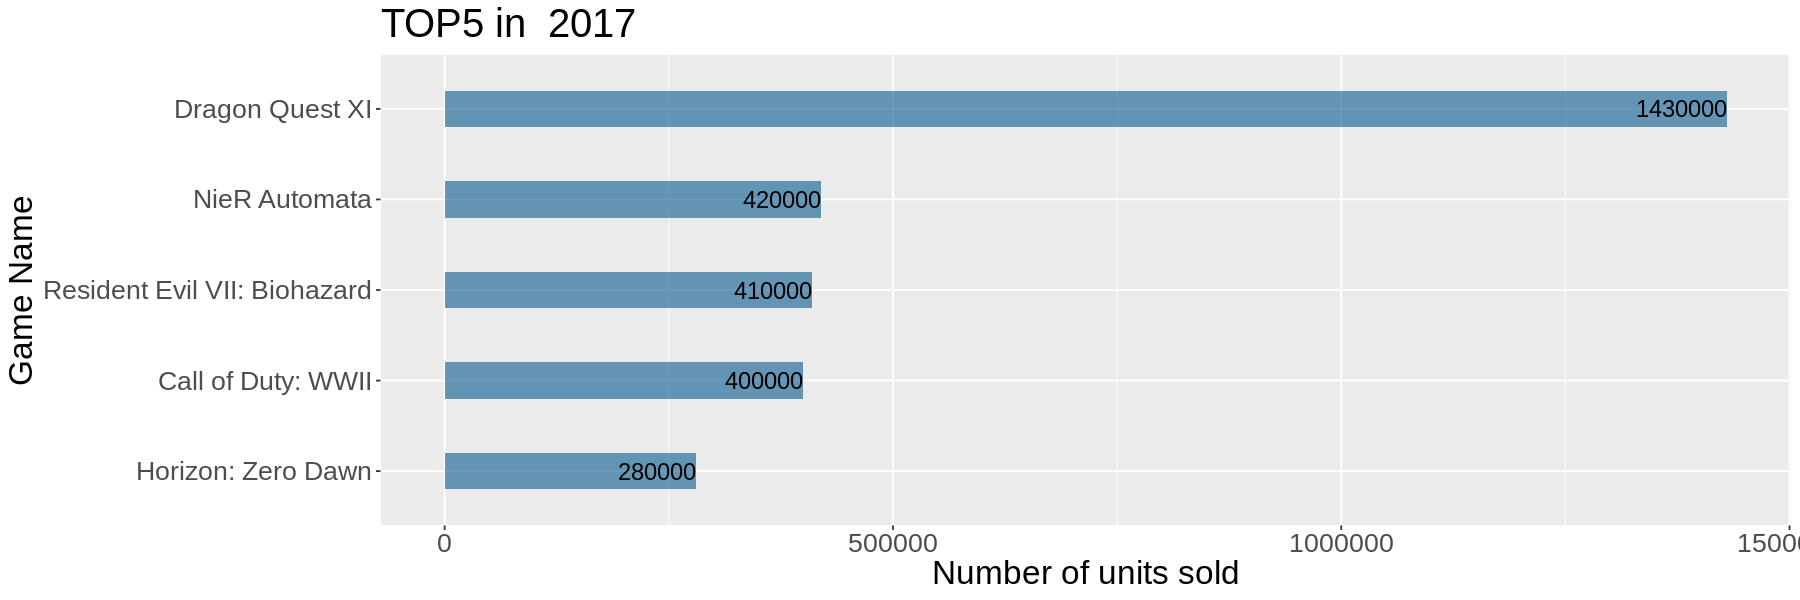

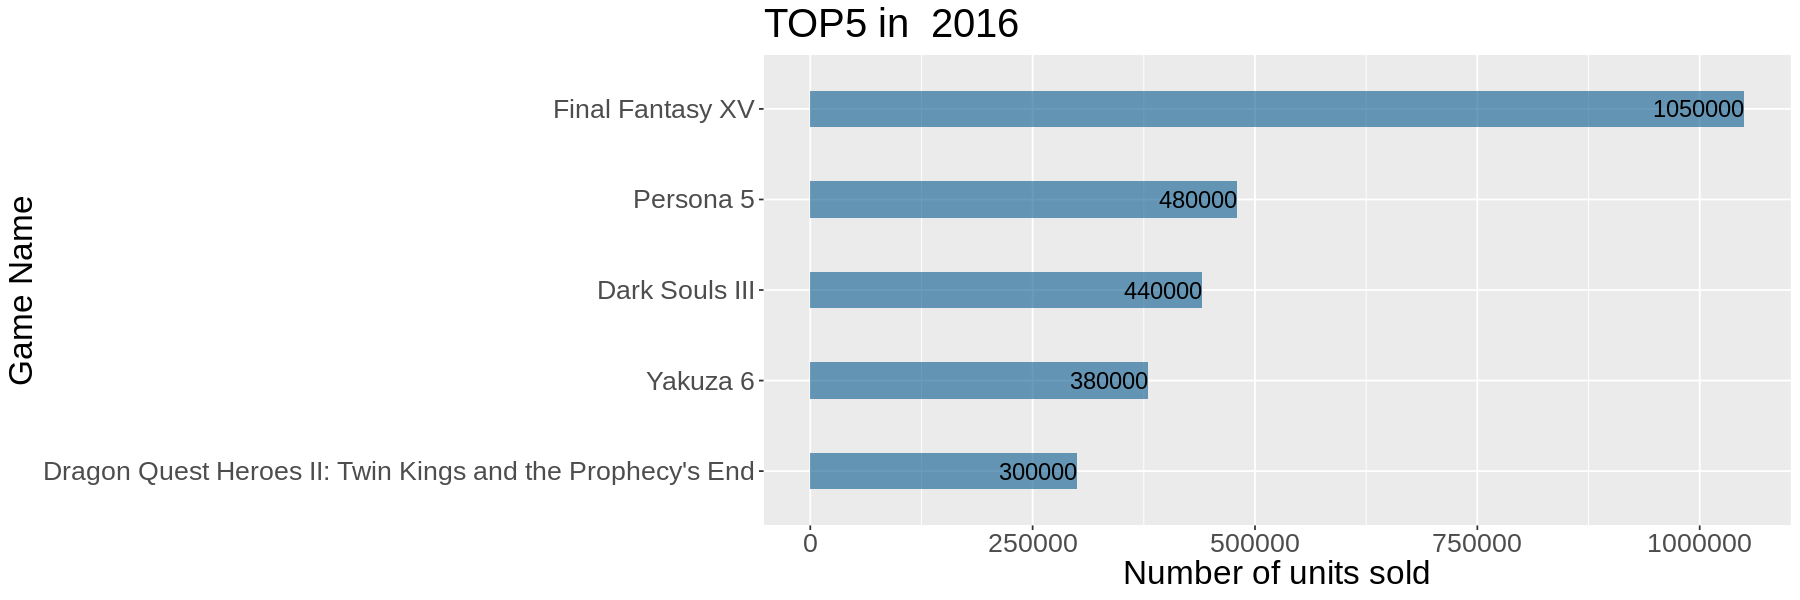

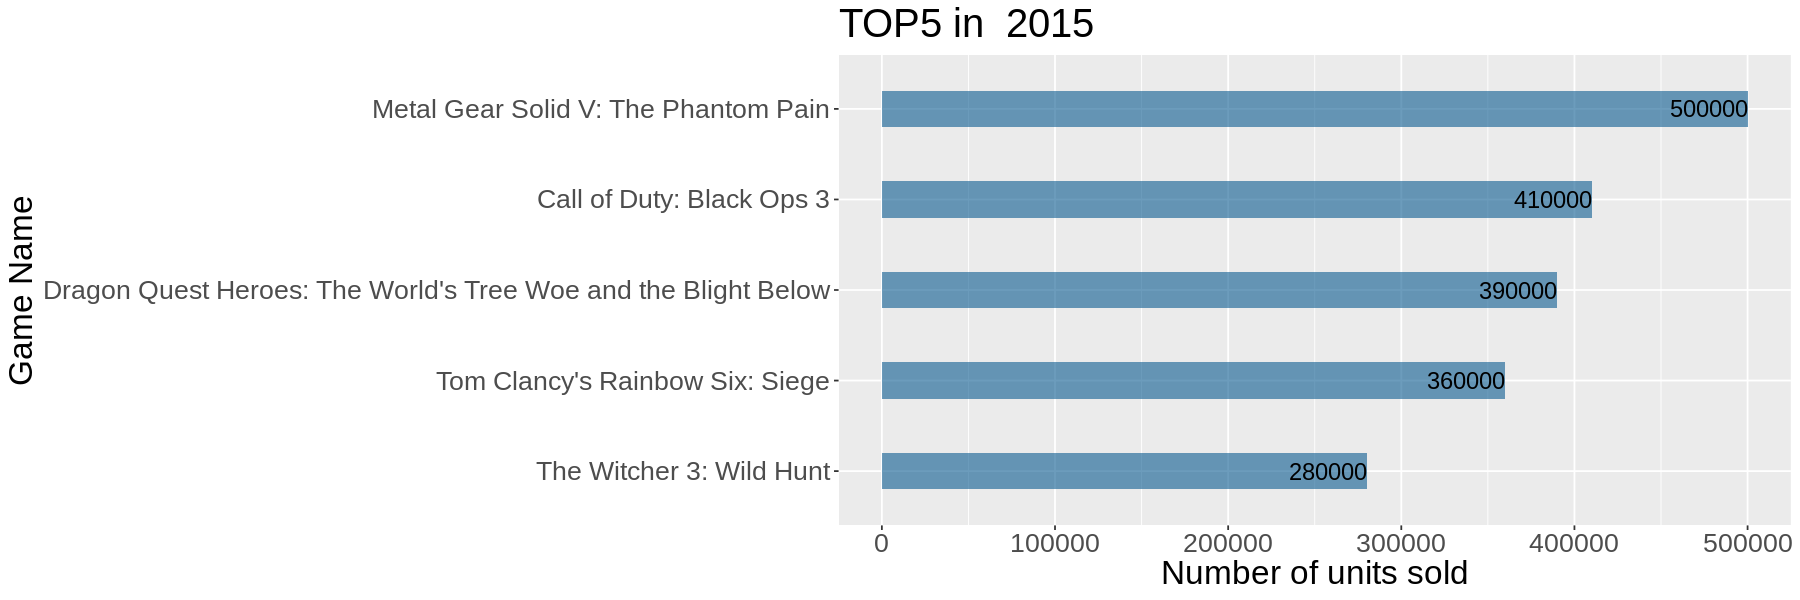

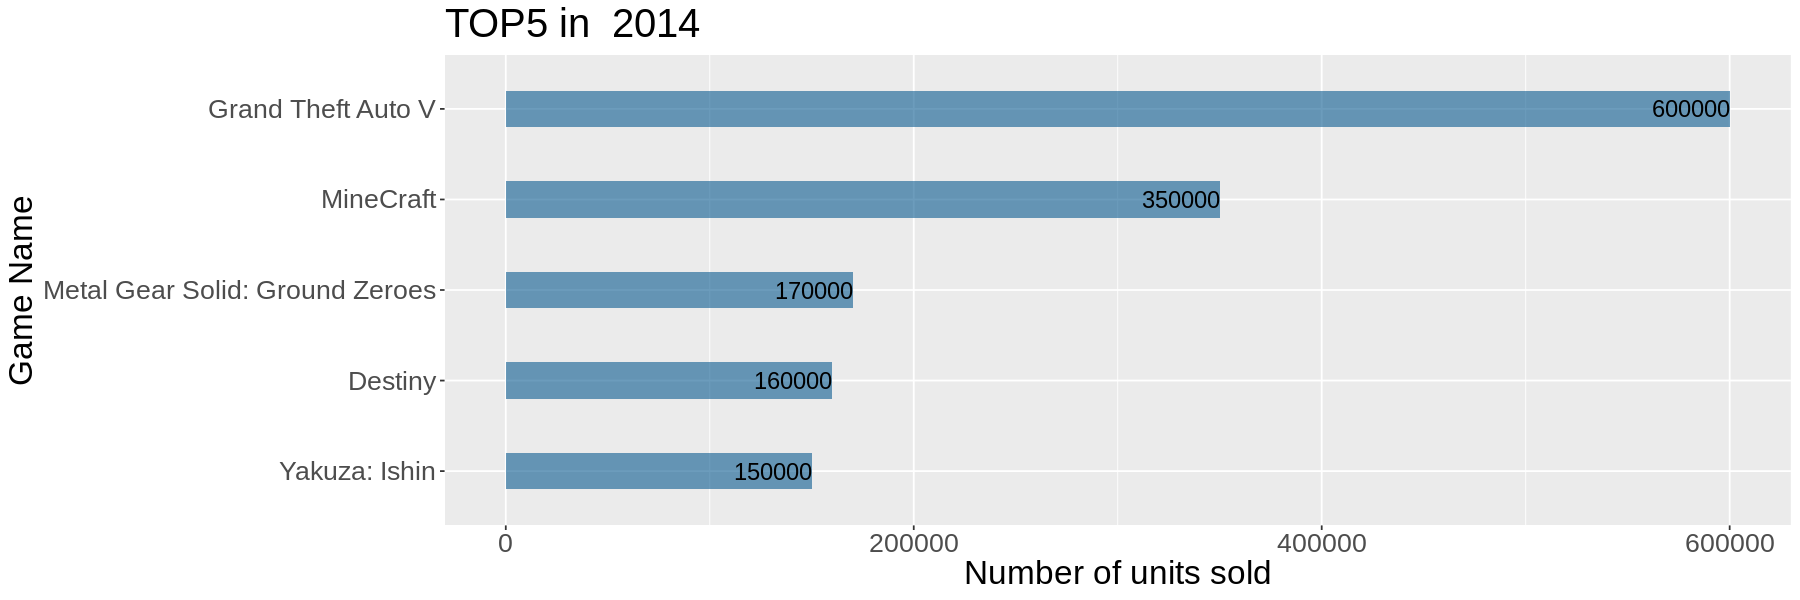

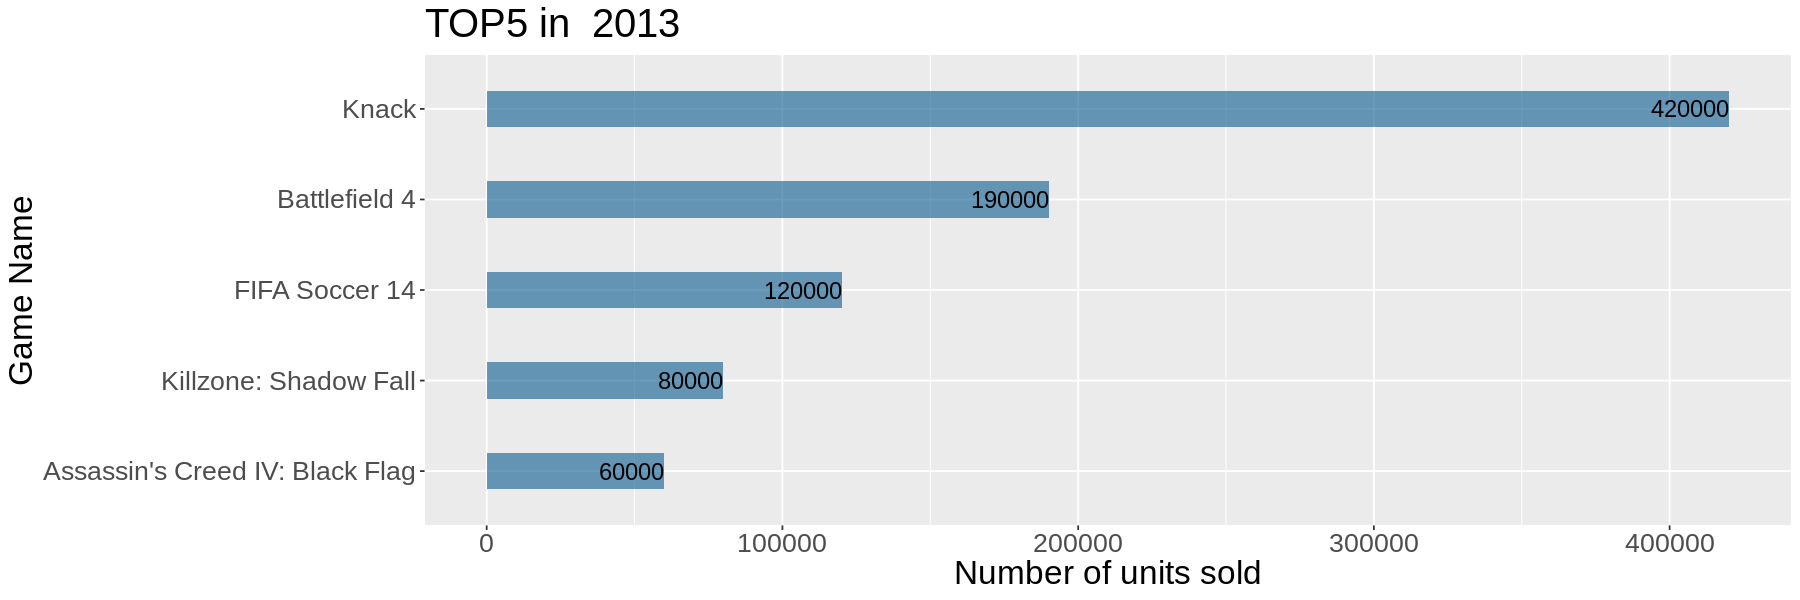

In [17]:
#Size of plots
options(repr.plot.width=15, repr.plot.height=5, scipen = 9999)

#Function for plots
plotting <- function(year){
ggplot(data= head(subset(df, Year == year), 5), aes(x=reorder(Name, Value), y=Value)) +
  geom_bar(stat="identity", fill="#0a5a8f", alpha=.6, width=.4) +
  coord_flip() +
  ggtitle(paste( "TOP5 in ", year)) +
  xlab("Game Name") +
  ylab("Number of units sold") +
  geom_text(aes(label=Value), vjust=0.5, hjust=1, color="black", size=5)+
  theme(text = element_text(size = 20))
}

plotting(2018)
plotting(2017)
plotting(2016)
plotting(2015)
plotting(2014)
plotting(2013)

#The popularity of game genres based on the 100 best-sold games in 2013-2018.

Genre,Count
<chr>,<int>
Action,29
Action-Adventure,7
Adventure,5
Fighting,6
Misc,2
Platform,1
Racing,1
Role-Playing,21
Shooter,17


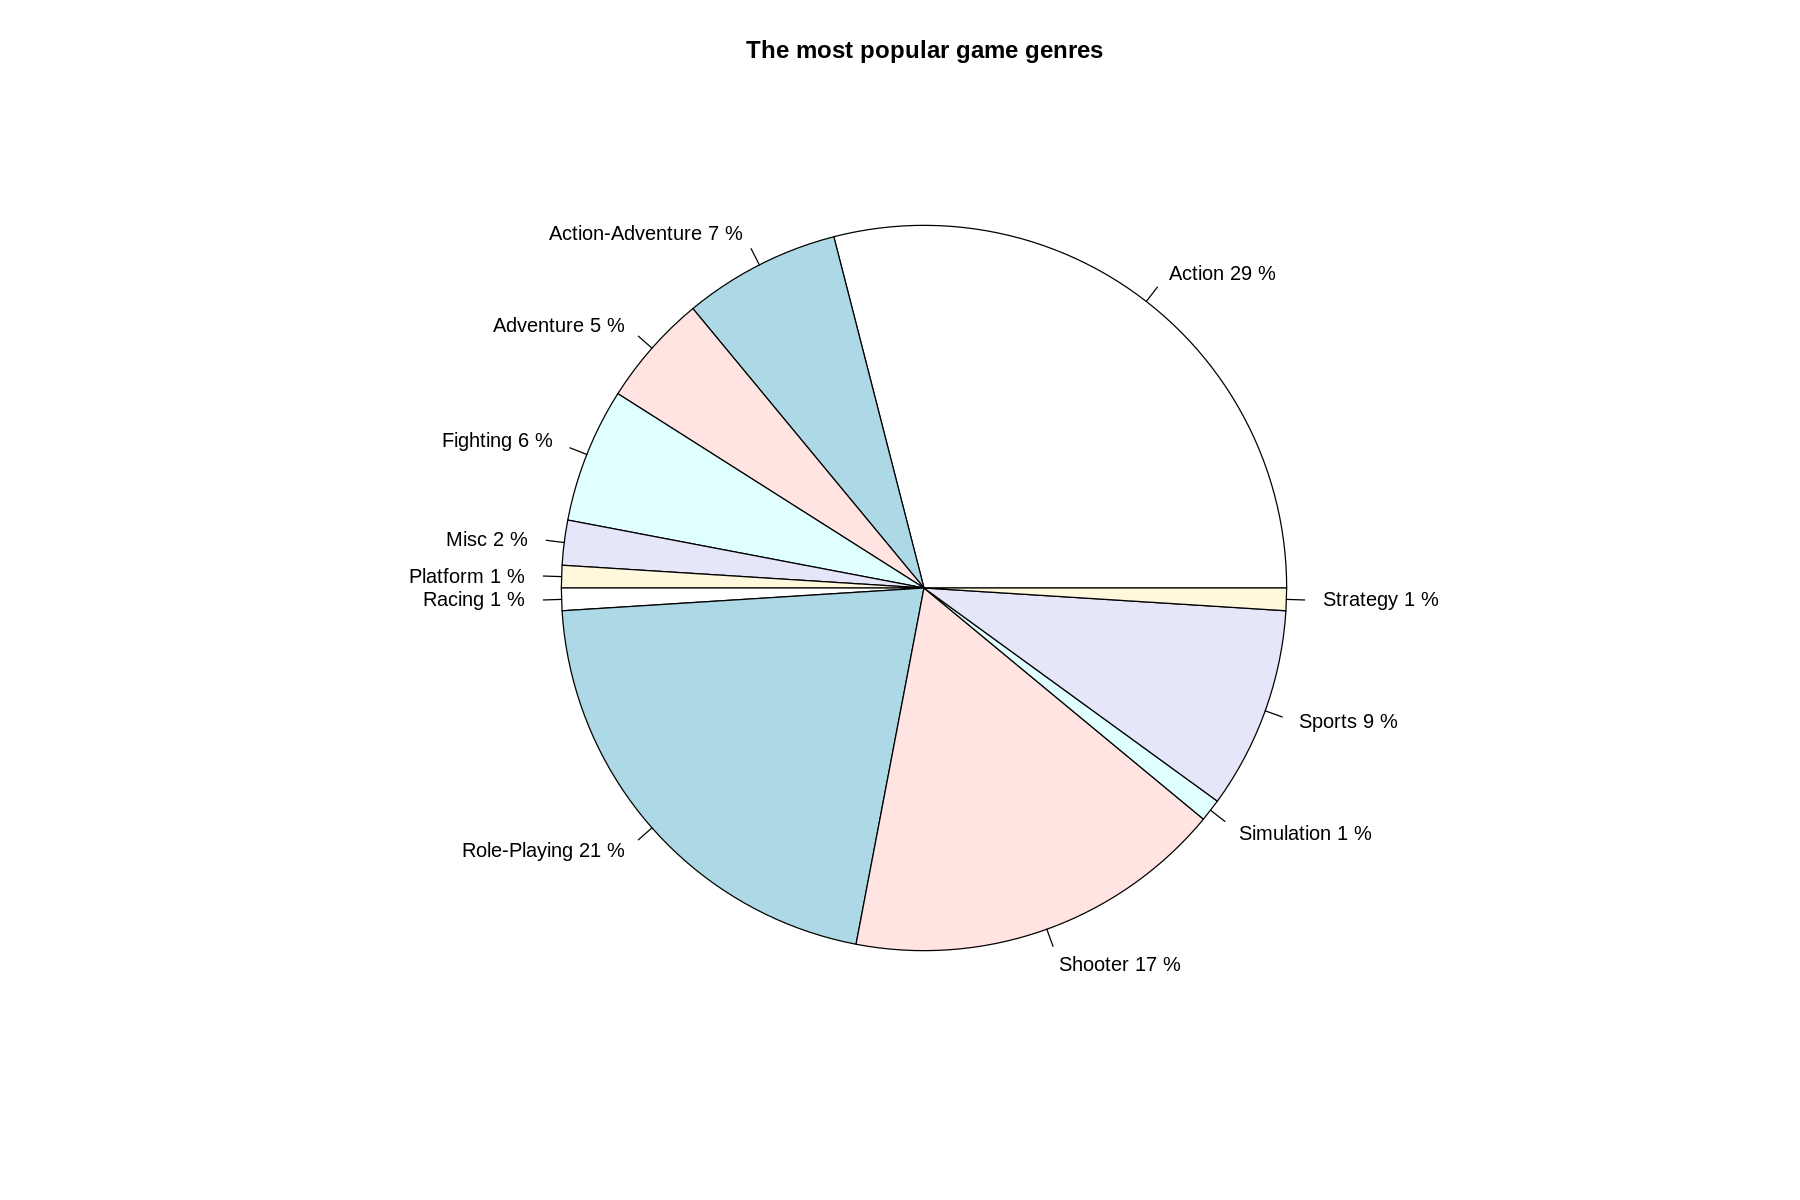

In [18]:
#Plot options
options(repr.plot.width=15, repr.plot.height=10)

#Top 100 with pipe from dplyr
count_100 <- head(df, 100) %>% group_by(Genre) %>% summarise(Count = n())
count_100

pieces <- count_100$Count
labels <- paste(count_100$Genre, pieces,"%") 

pie(pieces, labels, main = "The most popular game genres")